<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/04Computer_Vision_and_Convolutional_Neural_Networks_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to Convolution Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writing algorthim which can discover the pattern in visiual data . Such as camera of self deriving car recongize the car in front

#Get the data


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-08-11 16:07:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.8MB/s    in 5.7s    

2025-08-11 16:07:51 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning  project is becoming one with the data

And of a computer vision project ... this usually mean
visuallzing many sample of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

there are 2 directories and 0 images in 'pizza_steak
there are 2 directories and 0 images in 'pizza_steak/train
there are 0 directories and 750 images in 'pizza_steak/train/pizza
there are 0 directories and 750 images in 'pizza_steak/train/steak
there are 2 directories and 0 images in 'pizza_steak/test
there are 0 directories and 250 images in 'pizza_steak/test/pizza
there are 0 directories and 250 images in 'pizza_steak/test/steak


In [ ]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

To Visualize our images, first let's get the class name programmaticly

In [ ]:
 #Get the class programmaticly

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
#create a list of class name forn subdir
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['pizza' 'steak']


In [ ]:
#lets visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  #setup the target directory
  target_folder = target_dir+target_class

  #get the random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(target_folder)
  #read the image and plot this using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Show image shape. ${img.shape}")

  return img


['1705747.jpg']
pizza_steak/train/pizza
Show image shape. $(512, 512, 3)


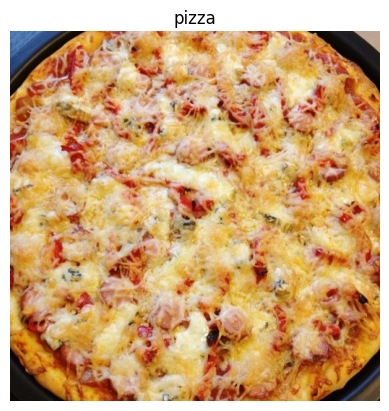

In [ ]:
#view image from trainig random set
imgg = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(imgg)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 75, 114, 169],
        [ 61, 100, 155],
        [ 62, 101, 158],
        ...,
        [189, 167, 146],
        [191, 169, 148],
        [192, 170, 149]],

       [[ 66, 105, 160],
        [ 68, 107, 162],
        [ 76, 115, 172],
        ...,
        [188, 166, 145],
        [189, 167, 146],
        [190, 168, 147]],

       [[ 72, 111, 166],
        [ 81, 120, 175],
        [ 86, 125, 182],
        ...,
        [187, 165, 144],
        [188, 166, 145],
        [188, 166, 145]],

       ...,

       [[ 14,  11,   4],
        [ 13,  10,   3],
        [ 13,  10,   3],
        ...,
        [105,  84,  63],
        [ 72,  51,  32],
        [ 44,  23,   4]],

       [[ 15,  12,   5],
        [ 14,  11,   4],
        [ 13,  10,   3],
        ...,
        [ 71,  50,  31],
        [ 43,  22,   5],
        [ 32,  11,   0]],

       [[ 16,  13,   6],
        [ 14,  11,   4],
        [ 12,   9,   2],
        ...,
        [ 40,  19,   

In [ ]:
 imgg.shape

(512, 512, 3)

In [ ]:
 #GET ALL PIXEL IN 0&1

 imgg/255

array([[[0.29411765, 0.44705882, 0.6627451 ],
        [0.23921569, 0.39215686, 0.60784314],
        [0.24313725, 0.39607843, 0.61960784],
        ...,
        [0.74117647, 0.65490196, 0.57254902],
        [0.74901961, 0.6627451 , 0.58039216],
        [0.75294118, 0.66666667, 0.58431373]],

       [[0.25882353, 0.41176471, 0.62745098],
        [0.26666667, 0.41960784, 0.63529412],
        [0.29803922, 0.45098039, 0.6745098 ],
        ...,
        [0.7372549 , 0.65098039, 0.56862745],
        [0.74117647, 0.65490196, 0.57254902],
        [0.74509804, 0.65882353, 0.57647059]],

       [[0.28235294, 0.43529412, 0.65098039],
        [0.31764706, 0.47058824, 0.68627451],
        [0.3372549 , 0.49019608, 0.71372549],
        ...,
        [0.73333333, 0.64705882, 0.56470588],
        [0.7372549 , 0.65098039, 0.56862745],
        [0.7372549 , 0.65098039, 0.56862745]],

       ...,

       [[0.05490196, 0.04313725, 0.01568627],
        [0.05098039, 0.03921569, 0.01176471],
        [0.05098039, 0

🔑 Note: Many Machine Learning models, including nerual network prefer the value they work with 0 & 1 . Knowing this is most common preprcocessing step for working with images is to scale(also referred to normalize) their pixel values by dividing the image array by 225

##An end to end example
Let's build a convolutional neural network to find pattern in our image more specificaly we need way to:



*  Load our images  
*  Preprocess our image
*  Build a CNN to finds pattern in images
*  Compile CNN
*  Fit the CNN our training data



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

#preproccess data (get all pixel value between 0&1 , also called noramlization or scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directory and trun into in batches
train_data = train_datagen.flow_from_directory(directory = train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size = 32,target_size = (224,224),class_mode="binary",seed = 42)


#Build a CNN to finds pattern in images
model_1 = tf.keras.models.Sequential([

   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224,224,3)),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
   tf.keras.layers.Conv2D(10,3,activation = "relu"),
   tf.keras.layers.Conv2D(10,3,activation = "relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,activation="sigmoid")

])

#Compile Our CNN

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

#fit the model
model1_history = model_1.fit(train_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_data = valid_data,
                             validation_steps = len(valid_data)
                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.6878 - loss: 0.5877 - val_accuracy: 0.8060 - val_loss: 0.4603
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7933 - loss: 0.4750 - val_accuracy: 0.8600 - val_loss: 0.3738
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8352 - loss: 0.4178 - val_accuracy: 0.8500 - val_loss: 0.3575
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.8616 - loss: 0.3486 - val_accuracy: 0.8220 - val_loss: 0.4104
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8658 - loss: 0.3396 - val_accuracy: 0.8580 - val_loss: 0.3321


In [ ]:
model_1.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8548 - loss: 0.3238


[0.33206281065940857, 0.8579999804496765]

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

##Using the same model as before

In [ ]:
#set random seed
tf.random.set_seed(42)


#create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid"),
])


model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data =valid_data,
                        validation_steps =len(valid_data)
                        )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.5188 - loss: 1.6307 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.4834 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5021 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.5085 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.4946 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5174 - loss: 0.6931


[0.6931491494178772, 0.5]

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Depite having 20X more parameter than our CNN (model_1), model_2 perfrom terribly..lets try


In [ ]:
#set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


#fit the model
history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5403 - loss: 8.1177 - val_accuracy: 0.7740 - val_loss: 0.6558
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7015 - loss: 1.0956 - val_accuracy: 0.5520 - val_loss: 1.1947
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6977 - loss: 0.7791 - val_accuracy: 0.7640 - val_loss: 0.4740
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.8056 - loss: 0.4421 - val_accuracy: 0.7840 - val_loss: 0.4789
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.8047 - loss: 0.4791 - val_accuracy: 0.7220 - val_loss: 0.6757


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

 **Note** :
 You can think of trainable parameter as **pattern a model can learn from data**. you might think more is better and in lots of case , It is But in this case the difference here in two diffrence style of model we're using . Where a series of dense layers have number of diffrenet learnable parameters connected to each other and hence a higher number of possible learnable patterns , **a convolutional neural network seek to sort out and learn the most important pattern in image** So even though these are less learnable parameter in our convolutional neural network , these are often more helpful in dechiphering between diffrent **feature** in an image

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classicfication: Let's break it down


1.  Become with data (visualize, Visualize , Visualize)

2.  Preprocess the data (prepared it for our model, the main step here was scaling/normailize)
3.  Create model (start with baseline)
4.  Fit the model
5.  Evaluate the model
6.  Adjust diffrent parameter and improve the model
7.  Repeat untill satisfied (expriment,expriment,expriment)





### 1. Become one  with data

['763690.jpg']
pizza_steak/train/steak
Show image shape. $(512, 512, 3)
['2228322.jpg']
pizza_steak/train/pizza
Show image shape. $(512, 512, 3)


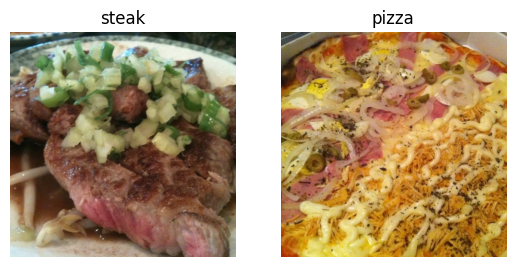

In [ ]:
#visualize the data
plt.figure()
plt.subplot(1,2,1)
view_image1 = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
view_image2  = view_random_image("pizza_steak/train/","pizza")

### Preprocess the Data (prepare it for model)

In [ ]:
#Define the dataset
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"



Our Next step is to turn our data into **batches**

A batch is small subset of data. Rather than look at all 10000 images at one time a model might look at 32 at time it does of couple of reason

1. 10000 images might not fit into the memmory of proceesor
2. Tring to learn the pattern in 10000 images in one hit could result in the model not being able to learn very well.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#load in our image data from directories and turn them into batches
train_data = test_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, label = train_data.__next__() #get the next batch of images/labels in train_data
len(images), len(label)

(32, 32)

In [ ]:
#how many batch are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
images[10].shape

(224, 224, 3)

In [ ]:
#view the first batch of labesl
label

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
      dtype=float32)

###3. Create CNN model (start with a baseline)
A Baseline is relatively simple model or existing result that you setup for beging a machine learning experiment, you try beat the baseline


In [ ]:
#create our  model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#create a model (this is will be our baseline , a layer convolution neural network)
model_4 = Sequential([
    Conv2D(filters=10, #filter is the number of slding window going across an input(higher = more complex model )
           kernel_size=3, # the size of the silding window going across input
           activation="relu", # size of the step the sliding window take across an input
           input_shape=(224,224,3),
           padding="valid"), #if "same" output shape is same as input shape if "valid",output shape get compressed
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid"),

])

In [ ]:
#compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics= ["accuracy"]
                )



### 4.fit the model


In [ ]:
#check the length of training and test data generator]
len(train_data),len(test_data)

(47, 16)

In [ ]:
#fit the model
history_model4=model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.5877 - loss: 1.4786 - val_accuracy: 0.7260 - val_loss: 0.5315
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7349 - loss: 0.5274 - val_accuracy: 0.7380 - val_loss: 0.5228
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7922 - loss: 0.4535 - val_accuracy: 0.7960 - val_loss: 0.4467
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8231 - loss: 0.4047 - val_accuracy: 0.8060 - val_loss: 0.4334
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8836 - loss: 0.3156 - val_accuracy: 0.8100 - val_loss: 0.4251


###5. Evalute our model
it look like our model is learning something


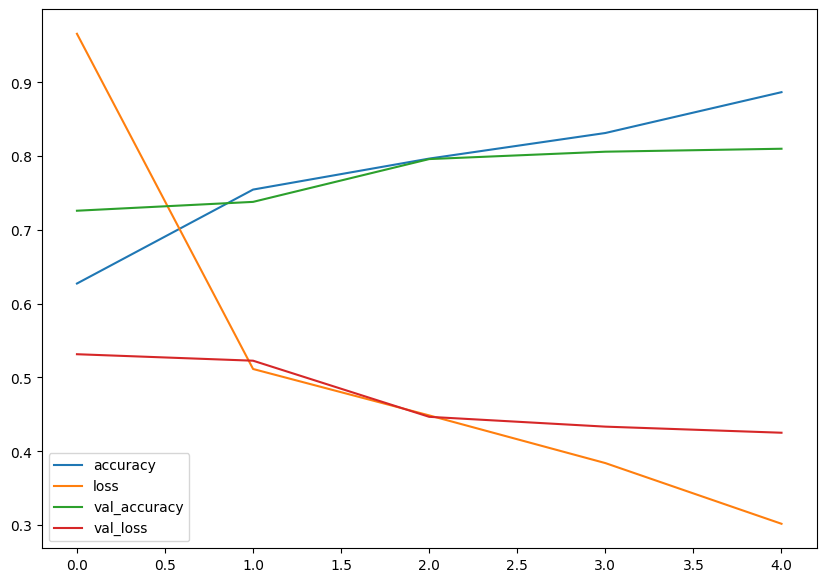

In [ ]:
#lets plot the model
import pandas as pd

pd.DataFrame(history_model4.history).plot(figsize=(10,7));

In [ ]:
#plot the validation and training curve sepratly

def plot_loss_curves(history):
  """
  Sparats loss curve for validtion and training metrics

  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))


  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot validtion
  plt.plot(epochs,accuracy,label="training_accurcy")
  plt.plot(epochs,val_accuracy,label="val_accurcy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

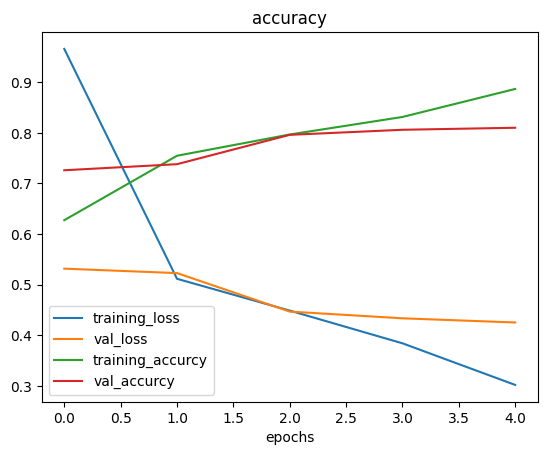

In [ ]:
#check the loss and accurey for model 4
plot_loss_curves(history_model4)

###6 Adjust the model parameter

Fiting the machin learning model come in 3 setps:

1. Create a baseline
2. Beat the baseline by overfiting a largel model
3. Reduce overfiting

Way to indcue overfiting
*   Increase the numbaer of conv layers
*.  Incerease the number of conv filter.
*.  Add another dense layers to output of our flatten layers

Reduce Overfiting


*   Add data agumention
*   Add regularzition layers(such as MaxPool2D)
*   Add more data..








In [ ]:
#create a model (this is going to our new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2,padding="valid"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid"),

    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
#fit the model
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data = test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.5798 - loss: 0.6547 - val_accuracy: 0.7960 - val_loss: 0.4445
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.7751 - loss: 0.4692 - val_accuracy: 0.8460 - val_loss: 0.3774
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8084 - loss: 0.4267 - val_accuracy: 0.8520 - val_loss: 0.3608
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8282 - loss: 0.4067 - val_accuracy: 0.8440 - val_loss: 0.3387
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8244 - loss: 0.3946 - val_accuracy: 0.8700 - val_loss: 0.3208


In [ ]:
#Get the summry
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

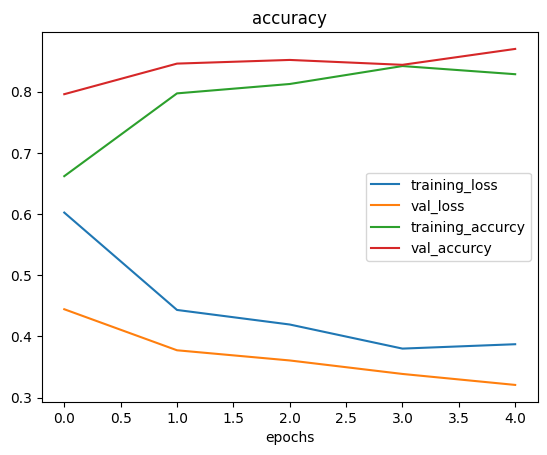

In [ ]:
plot_loss_curves(history_5)

###Opeing our bag of tricking and finding data augmention
   

In [ ]:
#create ImageDataGenrator  training instance with data augmentation
train_datagen_augmention = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,#how much roatation do you want
                                              shear_range =0.2,  #how much shear do you want?
                                              width_shift_range=0.2, #move your image around on the x-axis
                                              zoom_range= 0.2,#zoom in randomly on an image
                                              height_shift_range=0.2, #move your image around on the y-axis

)

#create imageDataGenrator without data augmnetion
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Import data and augment it form training direcotry
print("Agumented trainig data:")
train_data_augmented = train_datagen_augmention.flow_from_directory(train_dir,
                                                                     target_size=(256,256),
                                                                     batch_size= 32,
                                                                     class_mode="binary",
                                                                    shuffle=False
                                                                    )
print(" trainig data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                                     target_size=(256,256),
                                                                     batch_size= 32,
                                                                     class_mode="binary",
                                                                    shuffle=False
                                                                    )

print("test data:")
# test_datagen = test_datagen.flow_from_directory(test_dir,
#                                                                      target_size=(224,22),
#                                                                      batch_size= 32,
#                                                                      class_mode="binary",
#                                                                     shuffle=False
                                                                    # )

Agumented trainig data:
Found 1500 images belonging to 2 classes.
 trainig data:
Found 1500 images belonging to 2 classes.
test data:


Data Augmentation is the process of altering our training data ,leading it to have more diversity and it turn allow our model to train in more generalization

Alearting meaning is adjut the roation of image filping it,cropring it

In [ ]:
#Get the simple data batch
images , labels = train_data.__next__()
augmented_images , augmented_labels = train_data_augmented.__next__()

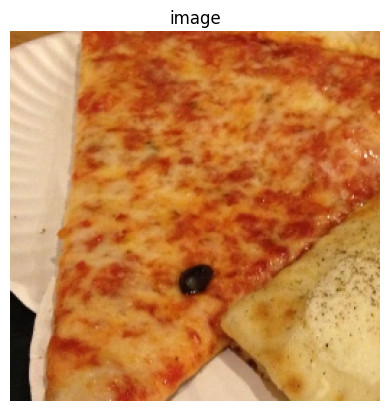

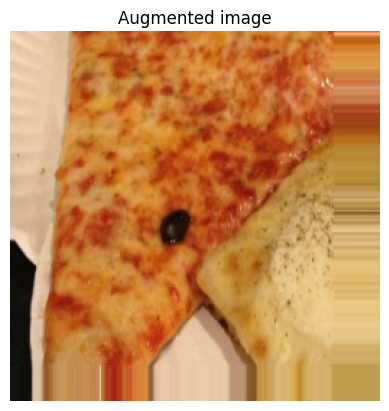

In [ ]:
#show the original image and augmented images
import random
random_number = random.randint(0,32)
plt.title(f"image")

plt.imshow(images[random_number])
plt.axis(False)
plt.figure()
plt.title(f"Augmented image")

plt.imshow(augmented_images[random_number])
plt.axis(False);


Now we seen what augmented training data look like,lets build a model see how

In [ ]:
# #create a model
# model_6 = Sequential([
#     Conv2D(10,3,activation="relu",input_shape=(256,256,3)),
#     MaxPool2D(pool_size=2,padding="valid"),
#     Conv2D(10,3,activation="relu"),
#     MaxPool2D(),
#     Conv2D(10,3,activation ="relu"),
#     MaxPool2D(),
#     Flatten(),

#  ])

# #compile the model
# model_6.compile(loss = "binary_crossentropy",
#                 optimizer = Adam(),
#                 metrics = ["accuracy"]
#                 )

# #Fit the model
# history_6 = model_6.fit(train_data_augmented,epochs=4,steps_per_epoch=len(train_data_augmented),
#                         validation_data = test_data,
#                         validation_steps = len(test_data)
#                         )

###7 Repeat untill satisfied


*  increase number of number of model layers (e.g. add more Con2D/MaxPool(
*  increase number of layers
*  Train of longer
*  Find the ideal learning rate
*  Get more data
*  use transfer learning to leverage what another image model,



## Making a predication with our train model with coustom data

In [ ]:
#Classes we are working with
print(class_name)

['pizza' 'steak']


--2025-08-11 16:11:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.008s  

2025-08-11 16:11:07 (202 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



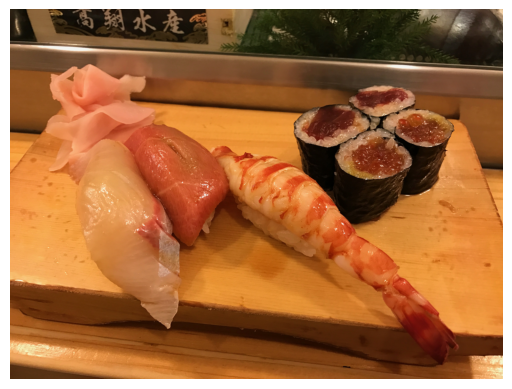

In [ ]:
 #view our image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
steak = mpimg.imread("03-sushi.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
#check the steak shape
steak.shape

(3024, 4032, 3)

Now that we have downloaded a custom image, we can use our trained model to make a prediction on it.

In [ ]:
steak


array([[[ 46,  38,  17],
        [ 46,  38,  17],
        [ 46,  38,  17],
        ...,
        [219, 186, 143],
        [219, 186, 143],
        [222, 189, 146]],

       [[ 48,  40,  19],
        [ 48,  40,  19],
        [ 48,  40,  19],
        ...,
        [221, 188, 145],
        [220, 187, 144],
        [221, 188, 145]],

       [[ 48,  41,  22],
        [ 48,  41,  22],
        [ 47,  40,  21],
        ...,
        [222, 189, 146],
        [220, 187, 144],
        [220, 187, 144]],

       ...,

       [[ 82,  47,  17],
        [ 83,  48,  18],
        [ 79,  44,  14],
        ...,
        [249, 217, 158],
        [250, 218, 159],
        [248, 216, 157]],

       [[ 82,  47,  17],
        [ 82,  47,  17],
        [ 78,  43,  13],
        ...,
        [245, 214, 157],
        [246, 215, 158],
        [244, 213, 156]],

       [[ 83,  48,  18],
        [ 83,  48,  18],
        [ 78,  43,  13],
        ...,
        [247, 216, 159],
        [249, 218, 161],
        [248, 217, 160]]

In [ ]:
expanded_steak = tf.expand_dims(steak,axis=0)


###  🗝 Note :-  when you train neural network with coustom data make sure your custom data will preprocessed into same formate as the  data your model was trained on


In [ ]:
#create funcation to importe image and resize it to able to be used with our model
def load_and_pre_image(filename,img_shape = 224):
  """
  Read the image from the filename turn into the tensor and resize it to (img_shape,img_shape)
  """
  #read the image
  img = tf.io.read_file(filename)
  #decode the file into tesnor
  img = tf.image.decode_image(img)
  #resize the img
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescale img
  img = img/255.
  return img

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
steak = load_and_pre_image("03-pizza-dad.jpeg")
steak

--2025-08-11 16:11:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-08-11 16:11:09 (258 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2887255 , 0.3009804 , 0.2632353 ],
        [0.44705883, 0.47843137, 0.39607844],
        [0.57598037, 0.5955882 , 0.5093137 ],
        ...,
        [0.05686275, 0.06862745, 0.04117647],
        [0.05588235, 0.0754902 , 0.04803922],
        [0.07745098, 0.08921569, 0.06176471]],

       [[0.9377451 , 0.9553922 , 0.9651961 ],
        [0.8838235 , 0.9102941 , 0.92107844],
        [0.9411765 , 0.9607843 , 0.9588235 ],
        ...,
        [0.04313726, 0.05490196, 0.02745098],
        [0.07843138, 0.09019608, 0.0627451 ],
        [0.08186275, 0.10147059, 0.07401961]],

       [[0.12745099, 0.13529412, 0.12352941],
        [0.175     , 0.17450981, 0.16617647],
        [0.12941177, 0.14901961, 0.13333334],
        ...,
        [0.03431373, 0.05196078, 0.0245098 ],
        [0.05833333, 0.07009804, 0.04264706],
        [0.05343137, 0.08088236, 0.0495098 ]],

       ...,

       [[0.24264705, 0.16029412, 0.07794118],
        [0.23

In [ ]:

pred=model_5.predict(tf.expand_dims(steak,axis=0))

pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


array([[0.31879377]], dtype=float32)

In [ ]:
#remind ourselves of our class
class_name

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#we can index the predicted class by rounding the predication
pred_class = class_name[int(tf.round(pred))]
round = int(tf.round(pred))

pred


array([[0.31879377]], dtype=float32)

In [ ]:
def pred_plot(model,filenames,class_names=class_name):
  img = load_and_pre_image(filenames)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred))]

  #plot the image
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

--2025-08-11 16:11:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-08-11 16:11:10 (278 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


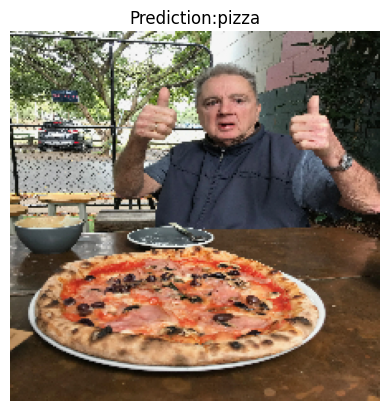

In [ ]:
#Test our model on coustom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_plot(model_5,"03-pizza-dad.jpeg")

###Multiclass image classfication

we've just been through a bunch of following step with binary classification problem (pizza vs steak). now we're going to up the noch with 10 class of food. (multiclass image classfication)




1.   Become with the data
2.   Preprocess the data(get it ready for model)
3.   Create a model(start baseline)
4.   fit the model (overfit it make sure it works)
5.   Evaluate the model
7.   Adjust the difftent hyperpreparameter and improve the model (try to beat base line / reduce overfiting)
8.   Repeat until statified




In [ ]:
## 1. import and become one the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2025-08-11 16:11:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 172.253.118.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.0MB/s    in 23s     

2025-08-11 16:11:35 (21.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip ourdata
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


In [ ]:
#set up train and test dir
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [ ]:
#lets get the clas name
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1232087.jpg']
10_food_classes_all_data/train/sushi
Show image shape. $(512, 512, 3)


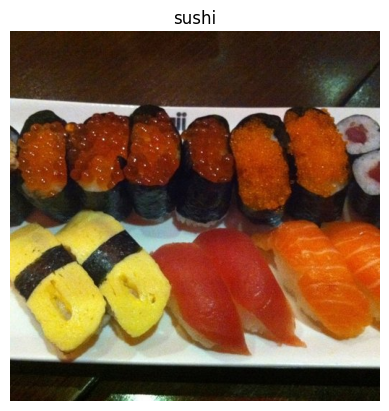

In [ ]:
# visulize visulize visulize

import random
img = view_random_image(train_dir,random.choice(class_name))

### 2 Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#resacle
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


#load data in from directory and turn it into bacths
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",

                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",

                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with baseline)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

#create model
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")

])
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )




###4. Fit the model

In [ ]:
model_8_history = model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 126ms/step - accuracy: 0.1610 - loss: 2.2945 - val_accuracy: 0.2792 - val_loss: 2.0401
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - accuracy: 0.3250 - loss: 1.9443 - val_accuracy: 0.3372 - val_loss: 1.8609
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.4407 - loss: 1.6654 - val_accuracy: 0.3492 - val_loss: 1.8648
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - accuracy: 0.5992 - loss: 1.2336 - val_accuracy: 0.3340 - val_loss: 2.0637
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.8187 - loss: 0.6275 - val_accuracy: 0.3024 - val_loss: 2.8829


### 5  evalucate the model  (did't save)
###6 Try Overfitiing , DATA AGUMENTATIO(did't save)



###7 Repeat Unstill satsified

How?

By running lot's of expriement
like:
1. restructuring our model architure (increase the layer/hiddin)
2. adjust the learning rate
3. try diffrent data augmentation( )
4. try transfer learning

In [ ]:
#data agunmentation

train_datagen_agum = ImageDataGenerator(rescale = 1/255.,
                                     rotation_range = 0.2,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)

train_data_aug = train_datagen_agum.flow_from_directory(train_dir,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode="categorical",
                                                       shuffle=False
                                                       )

Found 7500 images belonging to 10 classes.


In [ ]:
#making a predication with our model

class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')